<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Polygonal Regression for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)




### PGE 383 Exercise: Polygonal Regression for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of polygonalregression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression. 


## Linear Regression in Python for Engineers, Data Scientists and Geoscientists 
### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

Here's a simple workflow, demonstration of linear regression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression.  

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the model takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error over the trainind data $\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$

* this could be simplified as the sum of square error over the training data, $\sum_{i=1}^n (\Delta y_i)^2$

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Polygonal Regression

It can be shown that polygonal regression is just linear regression applied to a polygonal expansion of the predictor features.

\begin{equation}
X_{j} \rightarrow X_{j}, X_{j}^2, X_{j}^3, \ldots X_{j}^k 
\end{equation}

where we have $j = 1, \ldots, m$ original features.

We now have a expanded set of predictor features.

\begin{equation}
h_{j,k}(X_j) = X_j^k 
\end{equation}

were we have $j = 1, \ldots, m$ original features and $k = 1, \ldots, K$ polynomial orders.  

We can now state our model as a linear regression of the transformed features.

\begin{equation}
y = f(x) = \sum_{j=1}^{m} \sum_{k = 1}^{K} \beta_{j,k} h_{j,m}(X_j)
\end{equation}

So our workflow is:

* apply polynomial basis expansion

* perform linear regression

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

1. R https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R
2. Rmd with docs https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd 
3. knit as an HTML document(https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Basic Python workflows and data preparation

* Training / fitting a linear regression model

* Model Checking

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [120]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.linear_model import LinearRegression           # linear regression with scikit learn
from sklearn.preprocessing import PolynomialFeatures        # polynomial basis expansion
from scipy import stats                                     # statistical summary from a 2D ndarray

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [121]:
os.chdir("c:/PGE337")                                  # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density measures ($\frac{g}{cm^3}$) and porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [124]:
df = pd.read_csv("1D_Porosity.csv")                    # read a .csv file in as a DataFrame                                     # display first 4 samples in the table as a preview
df.head()                                                   # we could also use this command for a table preview 

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [125]:
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Depth,40.0,5.12500,2.922613,0.25,2.6875,5.125,7.5625,10.00
Nporosity,40.0,0.02225,0.992111,-2.08,-0.7575,0.140,0.7425,2.35


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [126]:
Npor = df['Nporosity']
depth = df['Depth']

#### Liner Regression Model

Let's first calculate the linear regression model



In [127]:
lin = LinearRegression() 
lin.fit(depth.values.reshape(-1, 1), Npor) 
slope = lin.coef_[0]
intercept = lin.intercept_

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = 0.14, and the intercept (b0) = -0.69


Let's plot the data and the model.

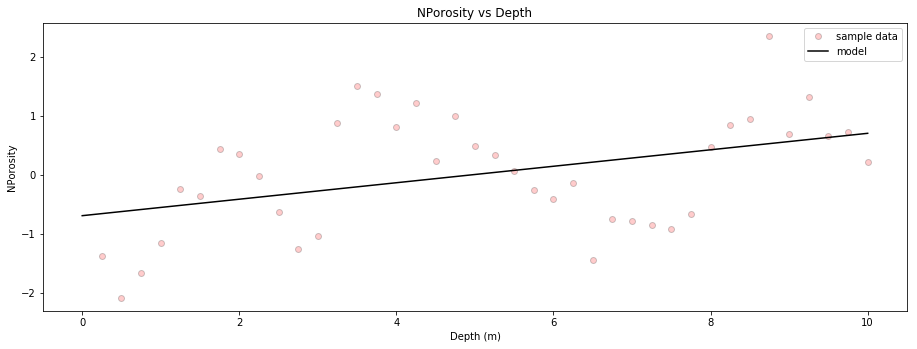

In [128]:
depth_values = np.linspace(0.0,10.0,100)
plt.subplot(111)
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(depth_values, intercept + slope*depth_values, label='model', color = 'black')
plt.title('NPorosity vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Standardized Features

Let's work with standardized features.


In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # instantiate the scaler 
sfeatures = scaler.fit_transform(df.values)              # standardize all the values extracted from the DataFrame 
df_st = pd.DataFrame()                                     # instantiate a new DataFrame
df_st = pd.DataFrame(sfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
depth_st = df_st['Depth']
Npor_st = df_st['Nporosity']
df_st.head()                                               # preview the the new DataFrame

,Depth,Nporosity
0,-1.689278,-1.421198
1,-1.602648,-2.145960
2,-1.516018,-1.727436
3,-1.429389,-1.206832
4,-1.342759,-0.267703


#### Linear Regression Model with Standardized Features

Let's repeat the lienar regression model, now with the standardized features.

In [131]:
lin_st = LinearRegression() 
lin_st.fit(depth_st.values.reshape(-1, 1), Npor_st) 
slope_st = lin_st.coef_[0]
intercept_st = lin_st.intercept_

Now visualize the model. 

* Quite a poor fit

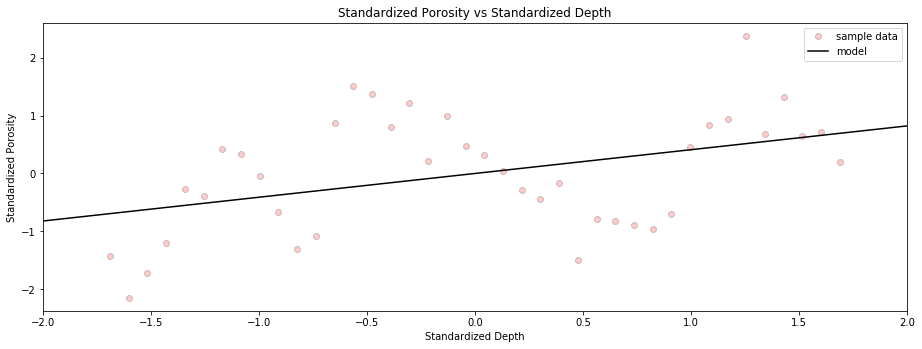

In [243]:
depth_st_values = np.linspace(-3.0,3.0,100)
plt.subplot(111)
plt.plot(depth_st, Npor_st, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(depth_st_values, intercept_st + slope_st*den_st_values, label='model', color = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.legend(); plt.xlim(-2,2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Polygonal Regression 

We will do polygonal regression by hand:

* create the polygonal basis expansion of the original predictor feature

* perform linear regression on the polygonal basis expansion

In [208]:
poly4 = PolynomialFeatures(degree = 4) 
depth_st_poly4 = poly4.fit_transform(depth_st.values.reshape(-1, 1)) 
df_depth_st_poly4 = pd.DataFrame({'Values':depth_st.values,'0th': depth_st_poly4[:,0],'1st': depth_st_poly4[:,1],'2nd': depth_st_poly4[:,2], '3rd': depth_st_poly4[:,3], '4th': depth_st_poly4[:,4]}) # make a new DataFrame from the vectors
df_depth_st_poly4.head()

,Values,0th,1st,2nd,3rd,4th
0,-1.689278,1.0,-1.689278,2.853659,-4.820621,8.143367
1,-1.602648,1.0,-1.602648,2.568480,-4.116370,6.597091
2,-1.516018,1.0,-1.516018,2.298311,-3.484282,5.282235
3,-1.429389,1.0,-1.429389,2.043152,-2.920458,4.174470
4,-1.342759,1.0,-1.342759,1.803002,-2.420997,3.250816


Now let's check the correlation between the polygonal basis expansion of the original predictor features data.

In [209]:
df_depth_st_poly4.iloc[:,2:].corr()

,1st,2nd,3rd,4th
1st,1.000000e+00,3.727299e-17,9.168975e-01,-1.856753e-17
2nd,3.727299e-17,1.000000e+00,0.000000e+00,9.587146e-01
3rd,9.168975e-01,0.000000e+00,1.000000e+00,1.893192e-17
4th,-1.856753e-17,9.587146e-01,1.893192e-17,1.000000e+00


Let's visualize the polygonal expansion over the standardized depth.

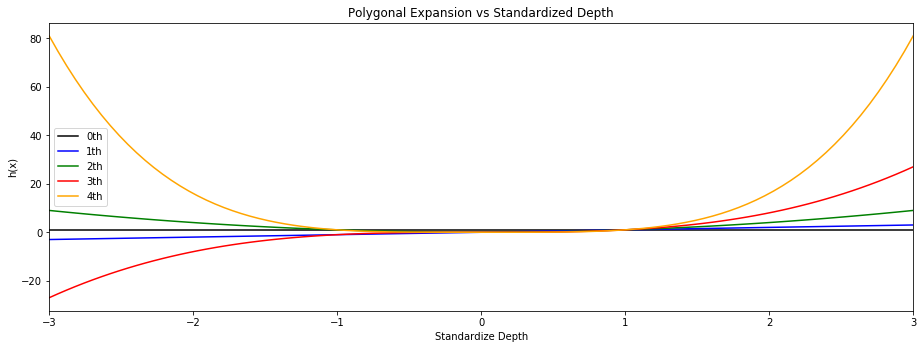

In [245]:
plt.subplot(111)
plt.plot(depth_st_values, poly4.fit_transform(depth_st_values.reshape(-1, 1)) [:,0], label='0th', color = 'black')
plt.plot(depth_st_values, poly4.fit_transform(depth_st_values.reshape(-1, 1)) [:,1], label='1th', color = 'blue')
plt.plot(depth_st_values, poly4.fit_transform(depth_st_values.reshape(-1, 1)) [:,2], label='2th', color = 'green')
plt.plot(depth_st_values, poly4.fit_transform(depth_st_values.reshape(-1, 1)) [:,3], label='3th', color = 'red')
plt.plot(depth_st_values, poly4.fit_transform(depth_st_values.reshape(-1, 1)) [:,4], label='4th', color = 'orange') 
plt.title('Polygonal Expansion vs Standardized Depth')
plt.xlabel('Standardize Depth')
plt.ylabel('h(x)')
plt.legend(); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

We can also check the arithmetic average of each polygonal basis expansion.

In [211]:
print('The means of each basis expansion, 0 - 4th order = ' + str(stats.describe(depth_st_poly4)[2]) + '.')

The means of each basis expansion, 0 - 4th order = [1.00000000e+00 4.44089210e-17 1.00000000e+00 4.44089210e-17
 1.79849906e+00].


Let's fit the linear regression model to the polygonal basis expansion.

* note the model is quite flexible to fit this complicated / nonlinear data

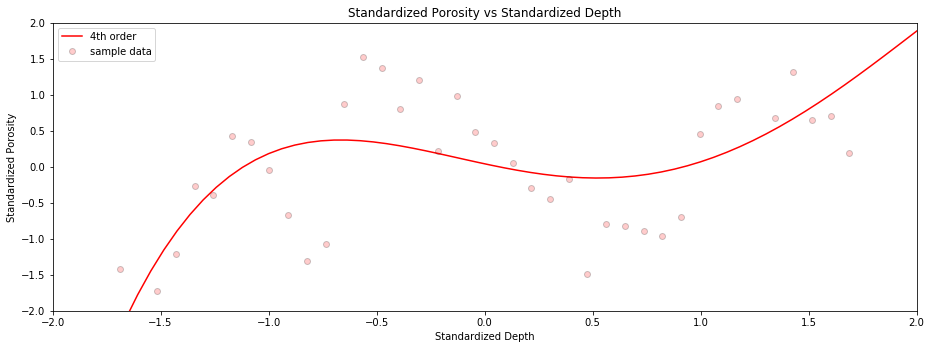

In [239]:
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_st_poly4.iloc[:,1:], Npor_st) 
plt.subplot(111)
plt.plot(depth_st_values, lin_poly4.predict(poly4.fit_transform(depth_st_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth_st, Npor_st, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Regression with Hermite Basis Expansion

We can use Hermite polynomials to reduce the correlation between the basis predictor features.

In [303]:
import scipy
orders4 = [0,1,2,3,4]
depth_hermite4 = scipy.special.eval_hermitenorm(orders4, depth_st.values.reshape(-1, 1), out=None) 
df_depth_hermite4 = pd.DataFrame({'value':depth_st.values,'0th': depth_hermite4[:,0],'1st': depth_hermite4[:,1],'2nd': depth_hermite4[:,2], '3rd': depth_hermite4[:,3], '4th': depth_hermite4[:,4]}) # make a new DataFrame from the vectors
df_depth_hermite4.head()

,value,0th,1st,2nd,3rd,4th
0,-1.689278,1.0,-1.689278,1.853659,0.247211,-5.978584
1,-1.602648,1.0,-1.602648,1.568480,0.691574,-5.813791
2,-1.516018,1.0,-1.516018,1.298311,1.063773,-5.507633
3,-1.429389,1.0,-1.429389,1.043152,1.367708,-5.084442
4,-1.342759,1.0,-1.342759,0.803002,1.607280,-4.567195


Let's check the correlation between the Hermite predictor features. There is improvement.

In [311]:
df_depth_hermite4.iloc[:,2:].corr()

,1st,2nd,3rd,4th
1st,1.000000e+00,-8.697032e-17,-8.378359e-01,-1.412950e-17
2nd,-8.697032e-17,1.000000e+00,-2.165947e-18,-9.763049e-01
3rd,-8.378359e-01,-2.165947e-18,1.000000e+00,3.694817e-18
4th,-1.412950e-17,-9.763049e-01,3.694817e-18,1.000000e+00


We can check the arithmetic averages of all the hermite basis expansions.

In [305]:
print('The means of each basis expansion, 0 - 4th order = ' + str(stats.describe(depth_st_poly4)[2]) + '.')

The means of each basis expansion, 0 - 4th order = [1.00000000e+00 4.44089210e-17 1.00000000e+00 4.44089210e-17
 1.79849906e+00].


Let's visualize Hermite polynomials over the range of the standardized depth.

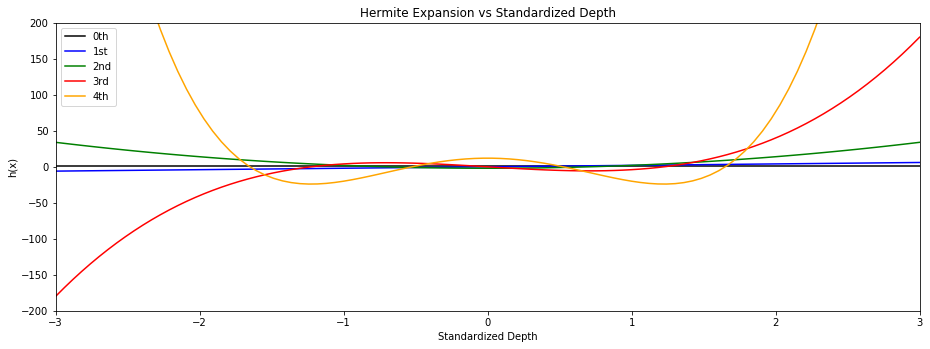

In [306]:
plt.subplot(111)
plt.plot(depth_st_values, scipy.special.eval_hermite(orders4, depth_st_values.reshape(-1, 1)) [:,0], label='0th', color = 'black')
plt.plot(depth_st_values, scipy.special.eval_hermite(orders4, depth_st_values.reshape(-1, 1)) [:,1], label='1st', color = 'blue')
plt.plot(depth_st_values, scipy.special.eval_hermite(orders4, depth_st_values.reshape(-1, 1)) [:,2], label='2nd', color = 'green')
plt.plot(depth_st_values, scipy.special.eval_hermite(orders4, depth_st_values.reshape(-1, 1)) [:,3], label='3rd', color = 'red')
plt.plot(depth_st_values, scipy.special.eval_hermite(orders4, depth_st_values.reshape(-1, 1)) [:,4], label='4th', color = 'orange')
plt.title('Hermite Expansion vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('h(x)')
plt.legend(); plt.ylim(-200,200); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Now let's fit our Hermite basis regression model.

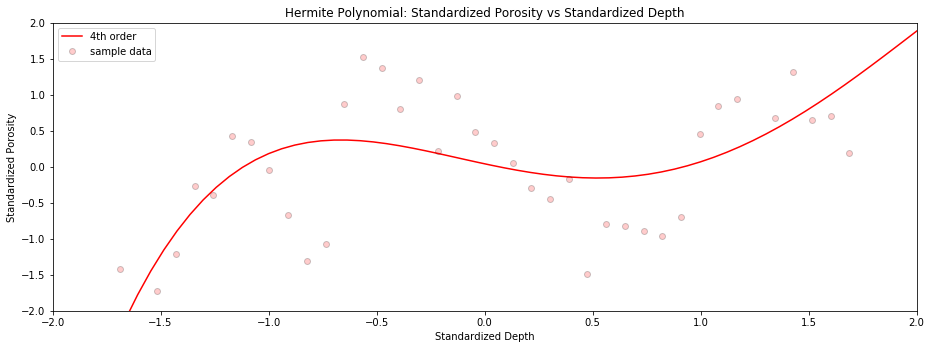

In [308]:
lin_herm4 = LinearRegression() 
lin_herm4.fit(df_depth_hermite4.iloc[:,1:], Npor_st) 
plt.subplot(111)
plt.plot(depth_st_values, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4, depth_st_values.reshape(-1, 1), out=None)), label='4th order',color = 'red') 
plt.plot(depth_st, Npor_st, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### TO BE COMPLETED: Orthogonal Polynomials

In [296]:
import numpy as np

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
      for i in np.arange(1,degree):
          Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

In [297]:
depth_ortho4 = ortho_poly_fit(depth_st.values.reshape(-1, 1), degree = 4)[0]
df_depth_ortho4 = pd.DataFrame({'value':depth_st.values,'0th': depth_ortho4[:,0],'1st': depth_ortho4[:,1],'2nd': depth_ortho4[:,2], '3rd': depth_ortho4[:,3], '4th': depth_ortho4[:,4]}) # make a new DataFrame from the vectors
df_depth_ortho4.head()

,value,0th,1st,2nd,3rd,4th
0,-1.689278,0.158114,-0.267098,0.327991,-0.359992,0.369224
1,-1.602648,0.158114,-0.253401,0.277531,-0.249225,0.179879
2,-1.516018,0.158114,-0.239704,0.229727,-0.153033,0.035378
3,-1.429389,0.158114,-0.226006,0.184578,-0.070628,-0.069934
4,-1.342759,0.158114,-0.212309,0.142085,-0.001221,-0.141399


In [298]:
df_depth_ortho4.iloc[:,2:].corr()

,1st,2nd,3rd,4th
1st,1.000000e+00,4.163336e-17,0.000000e+00,4.163336e-17
2nd,4.163336e-17,1.000000e+00,-8.326673e-17,-1.526557e-16
3rd,0.000000e+00,-8.326673e-17,1.000000e+00,2.775558e-17
4th,4.163336e-17,-1.526557e-16,2.775558e-17,1.000000e+00


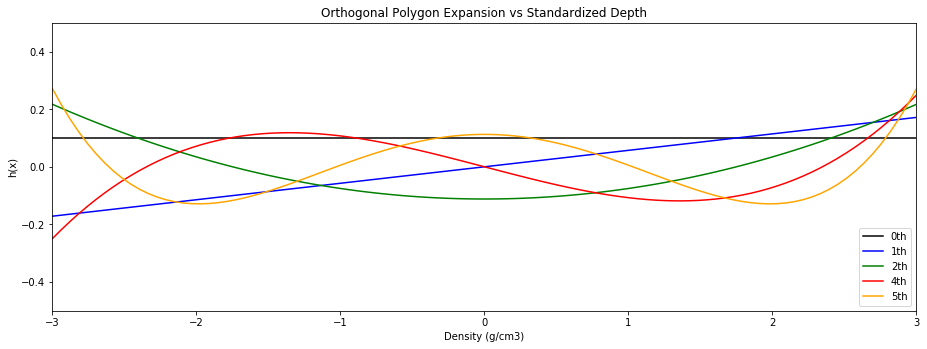

In [299]:
plt.subplot(111)
plt.plot(depth_st_values, ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0][:,0], label='0th', color = 'black')
plt.plot(depth_st_values, ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0][:,1], label='1th', color = 'blue')
plt.plot(depth_st_values, ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0][:,2], label='2th', color = 'green')
plt.plot(depth_st_values, ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0][:,3], label='4th', color = 'red')
plt.plot(depth_st_values, ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0][:,4], label='5th', color = 'orange')
plt.title('Orthogonal Polygon Expansion vs Standardized Depth')
plt.xlabel('Density (g/cm3)')
plt.ylabel('h(x)')
plt.legend(); plt.ylim(-.5,.5); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

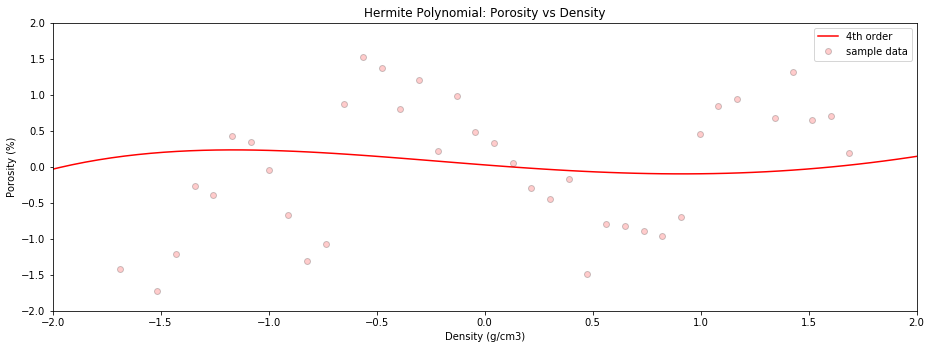

In [300]:
lin_ortho4 = LinearRegression() 
lin_ortho4.fit(df_depth_ortho4.iloc[:,1:], Npor_st) 
plt.subplot(111)
plt.plot(depth_st_values, lin_ortho4.predict(ortho_poly_fit(depth_st_values.reshape(-1, 1), degree = 4)[0]), label='4th order',color = 'red') 
plt.plot(depth_st, Npor_st, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Comments

Polygonal regression is a flexible method for modeling nonlinear data and it introduces the concept of basis expansion. There will be more on this later. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
